In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_excel("/content/monthly_sales_data.xlsx")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.set_index('Date', inplace=True)       # Make 'Date' the index
df.head()

,Sales
Date,
2022-01-01,11602
2022-02-01,12404
2022-03-01,13275
2022-04-01,13087
2022-05-01,13262


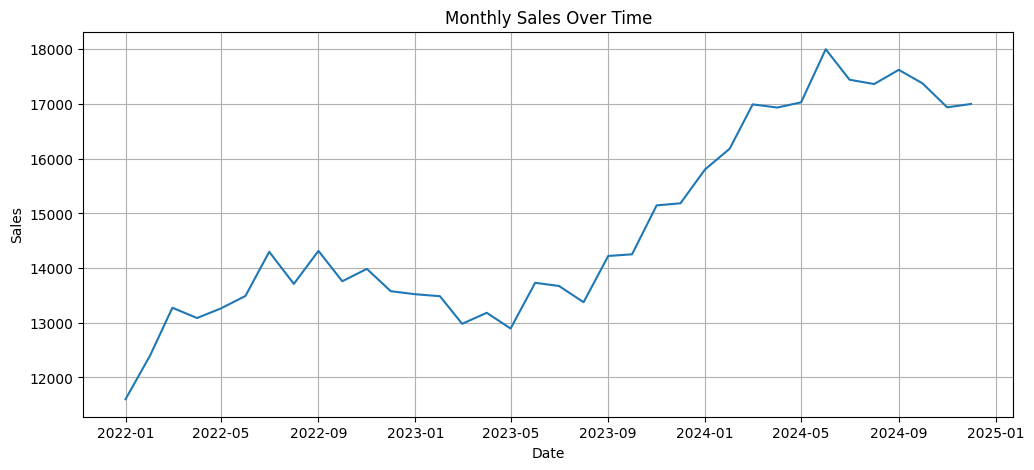

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x=df.index, y='Sales')
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

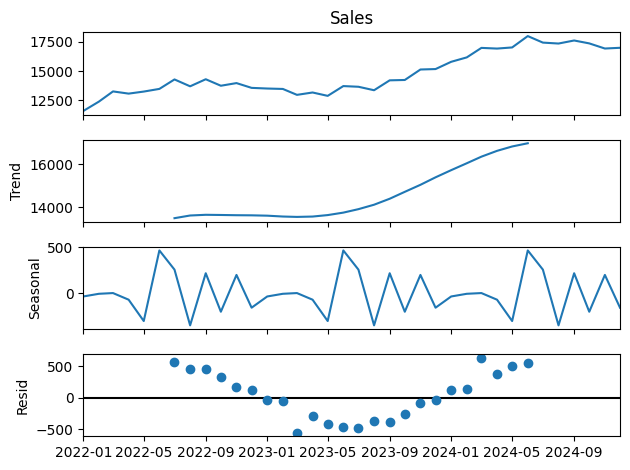

In [ ]:
result = seasonal_decompose(df['Sales'], model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = fit.forecast(steps=6)
print(forecast)

2025-01-01    16943.046221
2025-02-01    17366.075899
2025-03-01    17797.034397
2025-04-01    17785.572148
2025-05-01    17756.531299
2025-06-01    18402.963336
Freq: MS, dtype: float64


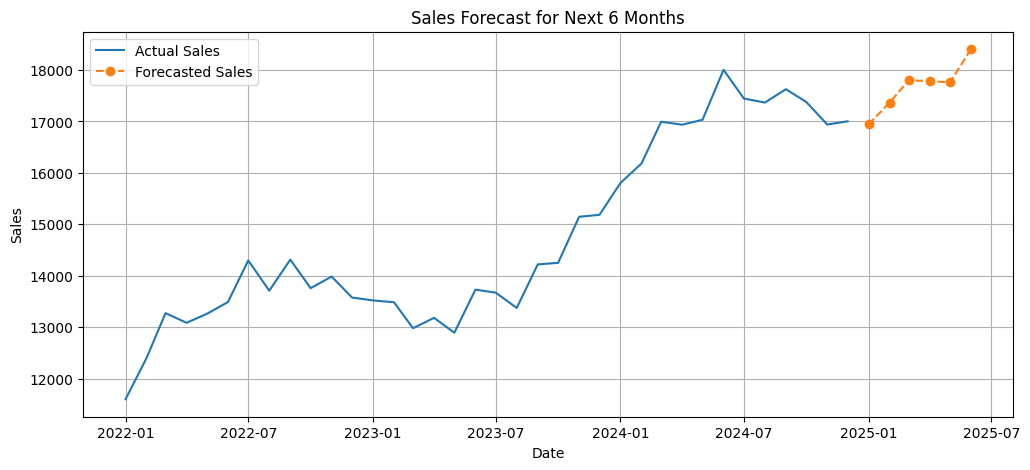

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Sales'], label='Actual Sales')
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
plt.plot(forecast_index, forecast, label='Forecasted Sales', linestyle='--', marker='o')
plt.title("Sales Forecast for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Export forecast to CSV
forecast_df = forecast.reset_index()
forecast_df.columns = ['Date', 'Forecasted_Sales']
forecast_df.to_csv('sales_forecast.csv', index=False)

# Optionally export original + forecast combined
combined_df = pd.concat([df['Sales'], forecast], axis=0).reset_index()
combined_df.columns = ['Date', 'Sales']
combined_df.to_csv('sales_with_forecast.csv', index=False)


In [ ]:
readme_text = """
# Sales Forecast Project

This project contains a time series forecast of sales data using Holt-Winters Exponential Smoothing.

## Files included:
- `sales_forecast.csv`: Forecasted sales for the next 12 months.
- `sales_with_forecast.csv`: Original historical sales combined with forecast data.
- `sales_forecast_plot.png`: Visualization of historical sales and forecast.

## Summary
The model uses seasonal Holt-Winters method assuming additive seasonality with a seasonal period of 12 months. It forecasts the sales for the upcoming 12 months based on historical trends and seasonal patterns.

## Usage
You can open the CSV files in Excel or any data analysis software. The plot image provides a quick visual understanding of sales trends.

## Author
Aman Anand
"""

with open('README.md', 'w') as f:
    f.write(readme_text)
